<h1>Tutorial for using autoBioSeqpy as modules in script</h1>

Using the <b>autoBioSeqpy</b> via command line is a good way for data modeling, but usually users would like to use <b>autoBioSeqpy</b> for something more, such as converting the FASTA data into matrix or combine the modeling to another workflow. 

This notebook provided the usage for using <b>autoBioSeqpy</b> as a library which could be imported normally. Moreover, few alternatives provided for some special case. We hope this tutorial could help user for understanding this tool deeply.


This notebook is available in jupyter notebook (editing and running is possible), but if you didn't install jupyter notebook, two copies in PDF and HTML version are available as well (read only).

<h2>1. First step: Initializing</h2>

As the first step, initializing is necessary for <b>autoBioSeqpy</b> by setting the <b>search path</b>.

The method‘import’ in python is a normal way for using a module in a default search path, but this time <b>autoBioSeqpy</b> didn't provide a way for ‘install’ and thus the search path is necessary for providing.

If <b>autoBioSeqpy</b> is already in your search path, you can import it directly.

<h3>1.1 Initializing the search path</h3>

There are several ways for importing the self-made modules/libraries. Considering that user might have different environment, please change the variable ‘libPath’ into the path where the tool located.

An alternative is provided, and available if uncomment it.

In [1]:
import os, sys
libPath = '../' #please change it into your search path if necessary
sys.path.append(libPath)
#alternative
#os.chdir(libPath)

In [2]:
import numpy as np #for some analysis

<h2>2. Data processing</h2>
Usually, users will write a script to converting the FASTA into matrix, here <b>autoBioSeqpy</b> provided few ways for the matrix creation.

<h3>2.1 import the related library</h3>

Library 'dataProcess' is provided for matrix creation form FASTA data. The necessary function such as suffle the samples and spliting the dataset into pieces (for cross validation) are provided as well.

Since the location is added into the search path in section <a href="#1.1-Initializing-the-search-path">1.1</a>, here we only need to import it as a module.

In [3]:
import dataProcess

<h3>2.2 Usage of module dataProcess</h3>

To load a dataset, first we need to instantiate an object and then using loading.

When intorducing it, some <b>cases</b> and <b>parameters</b> will be explained as well.

<h4>2.2.1 A detailed description for training data</h4>

<h5>dataType</h5>

Since Protein, DNA and RNA have their FASTA, we have to decide the type of this data. In our standalone script, '<b>dataType'</b> is a parameter, but here we don't have to determine it as a parameter directly.

<h5>dataEncodingType</h5>

This is a parameter for set the way to encoding the FASTA into matrix. Currently there are two encoding types available: 'onehot' and 'dict'.
If 'dict' choosed, a character (e.g. A/G/C/T for DNA) is represented as a number (such as A:1 T:2 C:3 T:4).

Alternetivly, if choose 'onehot',a character will be represented as an array (such as A:[1,0,0,0] G:[0,1,0,0] C:[0,0,1,0] T[0,0,0,1]). 

In this example, only 'dict' is used since it is better for displaying.

In [4]:
dataEncodingType = 'dict'

<h5>useKMer and KMerNum</h5>

Usually we would like to consider taking not only one FASTA residue for encoding, but also its neighbors. The parameter '<b>useKMer</b>' is an implementation for the environment encoding.

For example, if a sequence is ATTACT, and '<b>KMerNum</b>' is 3, then the first A will be considered as 'ATT'. 

Note that the shape of dataset will be expanded accordingly (see the manual for more details). And usually the 'useKMer' is used when 'dataEncodingType' set as 'oneHot'. And thus in this notebook, we don't use KMer since the encoding type is 'dict'.

If you are interesting for the KMer, please change the 'dataEncodingType' as 'onehot' and turn on the '<b>useKMer</b>' by set it into True.

In [5]:
useKMer = False
KMerNum = 3 #If useKMer is False, the KMerNum is inactive, and thus it doesn't matter how much the value is.

<h4>2.2.1.1 featureGenerator: the encoder</h4>

Now we can initialize a <b>featureGenerator</b>. A <b>featureGenerator</b> is a class for encoding the FASTA sequence.

There are three featureGenerator available: <b>ProteinFeatureGenerator</b>, <b>DNAFeatureGenerator</b> and <b>RNAFeatureGenerator</b>, you could use one of them according to the datatype. 

In this notebook, protein data is used, thus we use <b>ProteinFeatureGenerator</b> as the <b>featureGenerator</b>.


In [6]:
featureGenerator = dataProcess.ProteinFeatureGenerator(dataEncodingType, useKMer=useKMer, KMerNum=KMerNum)
#featureGenerator = dataProcess.DNAFeatureGenerator(dataEncodingType, useKMer=useKMer, KMerNum=KMerNum) #alternative for DNA data
#featureGenerator = dataProcess.RNAFeatureGenerator(dataEncodingType, useKMer=useKMer, KMerNum=KMerNum) #alternative for RNA data

<h4>2.2.1.2 File format and class DataLoader</h4>

With the encoder, now it's possible to read the FASTA data and encode them into matrix.

<b>autoBioSeqpy</b> provided a class ‘<b>DataLoader</b>’ for handle all the file reading things.  So here we need to introduce the format of the FASTA file.


<h5>File format</h5>
The so called ‘<b>file format</b>’ is the normal FASTA format. That is, a sequence is started by ‘> name&information’ and then few lines of FASTA characters followed. There is no limitation of the number of characters in a line, you can try few lines with not more than 60 characters or only 1 line with all characters. For example, the both formats are supported and can even mixed in one file:<br><br>
>case1 only 1 line <br>
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX...<br><br>
>case2 few lines<br>
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX<br>
XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX<br>
...<br>
XXXXXXXXXXXXXX<br>



<h5>label</h5>

The only thing should be concerned is the <b>label</b> of a file. Usually there are two (e.g. 1/-1 or 1/0) or more (e.g. case1, case2, case3, …) labels for a dataset, but the class DataLoader can handle one dataset with <b>the same label</b>, which means if a data has 3 labels, at least 3 files is necessary for reading.

In this notebook, the provided data is a binary classification, and therefore only two labels, <b>1 for positive samples and 0 negative samples</b>, are used.


<h5>spcLen</h5>

Here is another problem: usually the length is not the same for different sequences. 

To address it, the '<b>spcLen</b>' is provided. If the length of an input sequence is larger than the '<b>spcLen</b>', the exceed part will be ignored, and if the length is less than '<b>spcLen</b>', zeros (or zero arrays) will be added to make the length up to <b>spcLen</b>.


In [7]:
spcLen = 100

<h5>DataLoader</h5>

The class ‘<b>DataLoader</b>’ is a class for loading a file, thus usually we need at least two <b>DataLoader</b> for different label.

In this notebook, two files, 'train_pos.txt' and 'train_neg.txt', provided for training dataset, which can be found in 'data' folder. The labels are '1' and '0' respectively.



In [8]:
#the paths
dataTrainFilePaths = ['../examples/typeIIIsecretedeffectors/data/train_pos.txt','../examples/typeIIIsecretedeffectors/data/train_neg.txt']
#the related labels
dataTrainLabel = [1, 0]
#a list for recording the DataLoader
trainDataLoaders = []
for i,dataPath in enumerate(dataTrainFilePaths):
    #init
    dataLoader = dataProcess.DataLoader(label = dataTrainLabel[i], featureGenerator=featureGenerator)
    #file read
    dataLoader.readFile(dataPath, spcLen = spcLen)
    trainDataLoaders.append(dataLoader)

<h4>2.2.1.3 DataSetCreator: merge different dataLoader</h4>

After FASTA loading and encoding, now we can generate the matrix by merging the dataLoaders. The class ‘<b>DataSetCreator</b>’ is provided for the matrix merging and the necessary functions, such as sample shuffle and dataset split, are provided.

<b>NOTE</b>: Since the DataSetCreator is able to merge different DataLoader no matter whether the label is the same or not, thus if you have multiple files with the same label, you don’t have to merge them by hand, just merger them here.

In [9]:
#init
trainDataSetCreator = dataProcess.DataSetCreator(trainDataLoaders)

Then we can generate the matrix by using the method 'DataSetCreator' if the test dataset is in other files. 

The parameter '<b>toSuffle</b>' is a switch to s

In [10]:
#get dataset
trainDataMat, trainLabelArr = trainDataSetCreator.getDataSet(toShuffle=True)

We can have a look of the matrix and labels, all of them are numpy array.

In [11]:
print('Matrix with shape %d x %d:' %(trainDataMat.shape[0],trainDataMat.shape[1]))
print(trainDataMat)
print('\n')
print('The labels with length %d:' %(len(trainLabelArr)))
print(trainLabelArr)

Matrix with shape 907 x 100:
[[13 18  4 ...  3  3 10]
 [13 15  5 ...  4 11 10]
 [13  1 16 ... 18  4  4]
 ...
 [13 11 10 ... 19 15 18]
 [13 18 11 ... 15  3  4]
 [13  6 16 ... 21 21 21]]


The labels with length 907:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 

Now with the use of featureGenerator, DataLoader and DataSetCreator, the dataset is generated. 

<h4>2.2.2 The same process for test data</h4>

There are two way for generating the test data set: 1) from FASTA file or 2) from a built dataset.

<h5> 2.2.2.1 generate test dataset from other FASTA files</h5>

Sometimes the test data if from another bath/experiment, in this case, just generate the test dataset in the same way when generating the training set.

For example, in this notebook, we can load provided test data in folder ‘data/protein/test’.

<b>NOTE</b>: <br>
You can skip this subsection if you want to generate them by splitting.<br>
The parameter <b>spcLen</b> and object <b>featureGenerator</b> should be the same.<br>
And when generating the matrix, usually we don't have to shuffle the sample since it will not be used in training.

In [12]:
#the paths
dataTestFilePaths = ['../examples/typeIIIsecretedeffectors/data/test_pos.txt','../examples/typeIIIsecretedeffectors/data/test_neg.txt']
#the related labels
dataTestLabel = [1, 0]
#a list for recording the DataLoader
testDataLoaders = []
for i,dataPath in enumerate(dataTestFilePaths):
    #init
    dataLoader = dataProcess.DataLoader(label = dataTestLabel[i], featureGenerator=featureGenerator)
    #file read
    dataLoader.readFile(dataPath, spcLen = spcLen)
    testDataLoaders.append(dataLoader)
    
testDataSetCreator = dataProcess.DataSetCreator(testDataLoaders)
testDataMat, testLabelArr = testDataSetCreator.getDataSet(toShuffle=False)

We can have a look as well

In [13]:
print('Matrix with shape %d x %d:' %(testDataMat.shape[0],testDataMat.shape[1]))
print(testDataMat)
print('\n')
print('The labels with length %d:' %(len(testLabelArr)))
print(testLabelArr)

Matrix with shape 227 x 100:
[[13 17 12 ... 12  6  7]
 [13  5  4 ... 19  7 10]
 [13  6  3 ...  4  7 11]
 ...
 [13  3 16 ...  2  5  8]
 [13  8 11 ...  3 15 15]
 [13 11 16 ... 19  4 19]]


The labels with length 227:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]


<h5> 2.2.2.2 Alternative: generate test dataset by spliting a built one</h5>

Sometimes, we only have one dataset and all the samples in it could be used for either training or test. Thus <b>autoBioSeqpy</b> provided a way for splitting the dataset into two. 

The method is provided in class <b>DataSetCreator</b>. A new parameter <b>dataSplitScale</b> is provided to control the splitting ratio, if the '<b>dataSplitScale</b>' is 0.8, then the training dataset is 80% and the test dataset is 20% from the provided dataset.

In this notebook, we use the <b>trainDataSetCreator</b> as the example.

<b>NOTE</b>: You can skip this subsection if you don't have to split dataset.

In [14]:
dataSplitScale = 0.8
trainDataMat, testDataMat, trainLabelArr, testLabelArr = trainDataSetCreator.getTrainTestSet(dataSplitScale, toShuffle=True)

We can have a look as well

In [15]:
print('Training:')
print('Matrix with shape %d x %d:' %(trainDataMat.shape[0],trainDataMat.shape[1]))
print(trainDataMat)
print('\n')
print('The labels with length %d:' %(len(trainLabelArr)))
print(trainLabelArr)
print('\n########################################################################################')
print('########################################################################################\n')
print('Testing:')
print('Matrix with shape %d x %d:' %(testDataMat.shape[0],testDataMat.shape[1]))
print(testDataMat)
print('\n')
print('The labels with length %d:' %(len(testLabelArr)))
print(testLabelArr)

Training:
Matrix with shape 725 x 100:
[[13  1  4 ...  6  9  3]
 [13 14  5 ... 14 16 11]
 [13  3 14 ... 19 11  3]
 ...
 [13  7  5 ... 20 15 17]
 [13  2 17 ... 16  4  8]
 [13 10 15 ... 11  7  5]]


The labels with length 725:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

<h2>3. Data Modeling and Testing</h2>

After the data generated in section 2, now the dataset is available for modeling. Since it is a matrix, the data could be used for not only deep learning but also other machine learning as well. 

Here we made a brief introduce by using <b>keras</b> for deep learning, and provided a traditional example by using random forest at last.




<h3>3.1 Using keras for modeling</h3>

<a href=https://keras.io/>Keras</a> is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, CNTK, or Theano. 

Keras is useful for modeling the dataset by both 'dict' and 'onehot', but the neural network and related parameters should be set carefully.

Few templates provided in the folder 'models', users could copy them directly and change few related parameters such as to make sure the shape of the data is the same as the kernel size of the first layer.

In this notebook, since 'dict' is used as the encoding, the 1D neural network is a good choice for modeling, therefore, the model in 'model/CNN_Conv1D+GlobalMaxPooling.py'. Here the <b>maxlen</b> should be changed as the same with <b>spcLen</b>.

Here are two ways for using the model, one is write (or copy/post) the code in the script directly, another one is read a built model (in .json format) by using our provided module.

<h3>3.1 building keras model directly</h3>
<h4>3.1.1 model generating</h4>
As mentioned before, users could write any code for building keras neural network, but should modify the parameters manually.

In [14]:
os.environ["CUDA_VISIBLE_DEVICES"] = '-1' #force using CPU, comment it for using GPU

In [15]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalMaxPooling1D
from keras import optimizers



# set parameters:
max_features = 26
embedding_size = 128
filters = 250
kernel_size = 3
hidden_dims = 250
batch_size = 40
epochs = 25

#the parameter which need to modified
maxlen = spcLen


print('Building model...')
model = Sequential()
# we start off with an efficient embedding layer which maps amino acids
# indices into embedding_dims dimensions
model.add(Embedding(max_features, embedding_size, input_length = maxlen))
model.add(Dropout(0.2))
# we add a Convolution1D, which will learn filters word group filters of 
# size filter_length:
model.add(Conv1D(filters,kernel_size,padding = 'valid',activation = 'relu',strides = 1))
# we use max pooling:
model.add(GlobalMaxPooling1D())
# We add a vanilla hidden layer:
model.add(Dense(hidden_dims))
model.add(Dropout(0.2))
model.add(Activation('relu'))
# We project onto a single unit output layer, and squash it with a sigmoid:
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss = 'binary_crossentropy',optimizer = optimizers.Adam(),metrics = ['acc'])

model.summary()



Using TensorFlow backend.


Building model...
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 128)          3328      
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 128)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 98, 250)           96250     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 250)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               62750     
_________________________________________________________________
dro

<h4>3.1.2 training</h4>
After the model built, now the dataset is ready for training, keras provided a framework for the training phase, just use it for the training dataset.

<b>NOTE</b>:<br>
The parameters <b>batch_size</b> and <b>epochs</b> are defined above.

<h5>analysisPlot</h5>
analysisPlot is a module provided for analyze the modeling process when using keras. We can import it easily since the search path is set before.

In [16]:
import analysisPlot

In [17]:
history = analysisPlot.LossHistory()
model.fit(trainDataMat, trainLabelArr,batch_size = batch_size,epochs = epochs,validation_split = 0.1,callbacks = [history])


Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
Train on 816 samples, validate on 91 samples
Epoch 1/25
816/816 [==============================] - 1s 1ms/step - loss: 0.6562 - acc: 0.6275 - val_loss: 0.4160 - val_acc: 1.0000
Epoch 2/25
816/816 [==============================] - 1s 715us/step - loss: 0.6228 - acc: 0.6397 - val_loss: 0.4217 - val_acc: 1.0000
Epoch 3/25
816/816 [==============================] - 1s 742us/step - loss: 0.5415 - acc: 0.7463 - val_loss: 0.4396 - val_acc: 0.8132
Epoch 4/25
816/816 [==============================] - 1s 657us/step - loss: 0.4746 - acc: 0.7794 - val_loss: 0.5666 - val_acc: 0.7033
Epoch 5/25
816/816 [==============================] - 1s 704us/step - loss: 0.4316 - acc: 0.8125 - val_loss: 0.2134 - val_acc: 0.9451
Epoch 6/25
816/816 [==============================] - 1s 700us/step - loss: 0.3869 - acc: 0.8260 - val_loss: 0.2779 - val_acc: 0.8901
Epoch 7/25
816/816 [=======

<h4>3.1.3 testing and output analysis</h4>
The frame for predicting is provided by keras as well, therefore we can make the predict as well.

In [18]:
predicted_Probability = model.predict(testDataMat)
prediction = model.predict_classes(testDataMat)

<h4>3.1.4 showing modeling figures and predicting preference</h4>

Usually users would like to know the predicting performance, therefore the related function is provided as well.

Users could get how the loss changes as the epoch increasing, and some metrices (ACC, Recall, MCC...) as well.

All the figure is available for save by change the parameter <b>savePath</b> to a real path.

This time the metrices are available in sklearn, import them at first.

In [19]:
from sklearn.metrics import accuracy_score,f1_score,roc_auc_score,recall_score,precision_score,confusion_matrix,matthews_corrcoef 

<h5>The change of loss</h5>

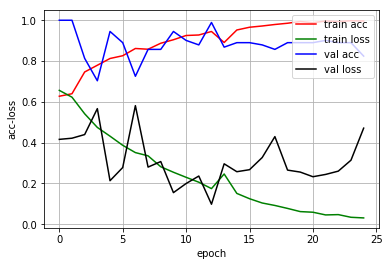

In [20]:
history.loss_plot('epoch',showFig=True,savePath=None)

<h5>confusion matrix and related metrices</h5>

In [21]:
cm=confusion_matrix(testLabelArr,prediction)
print(cm)
print("ACC: %f "%accuracy_score(testLabelArr,prediction))
print("F1: %f "%f1_score(testLabelArr,prediction))
print("Recall: %f "%recall_score(testLabelArr,prediction))
print("Pre: %f "%precision_score(testLabelArr,prediction))
print("MCC: %f "%matthews_corrcoef(testLabelArr,prediction))
print("AUC: %f "%roc_auc_score(testLabelArr,prediction))

[[125  26]
 [  9  67]]
ACC: 0.845815 
F1: 0.792899 
Recall: 0.881579 
Pre: 0.720430 
MCC: 0.680752 
AUC: 0.854697 


<h5>ROC curve</h5>

<Figure size 432x288 with 0 Axes>

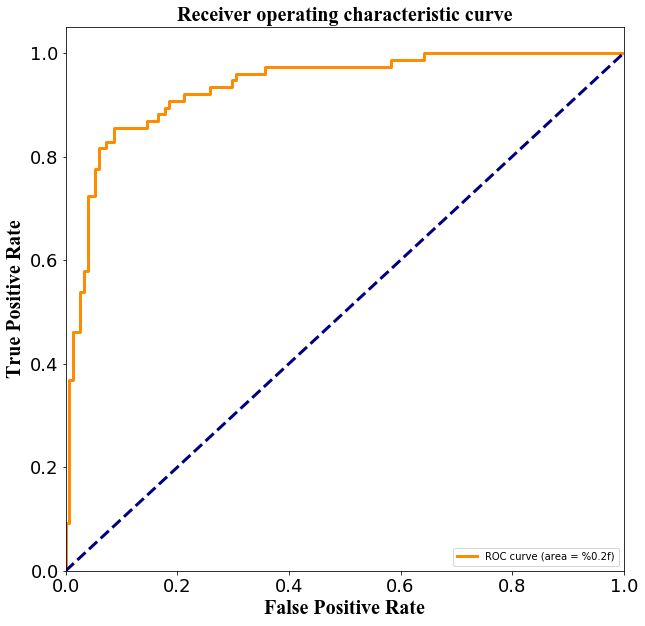

In [22]:
analysisPlot.plotROC(testLabelArr,predicted_Probability,showFig=True,savePath=None)

<h4>3.1.5 Save/Load a module (optional) </h4>

As mentioned before, keras is able to save a built model and read it again, it is available for establish a model without the data or using it for transfer learning. 

Therefore, a shor part of the code (i.e. in our module 'moduleRead') is provided here for implement this function. 

<h5>Model save</h5>
Not only the module, but also the weight could be saved.

In [23]:
modelSavePath = './tmpModel.json'
weightSavePath = './tmpWeight.bin'

In [24]:
model_json = model.to_json()
with open(modelSavePath, "w") as json_file:
    json_file.write(model_json)
model.save_weights(weightSavePath)

<h5>Model Load</h5>

In [25]:
from keras.models import model_from_json

In [26]:
json_file = open(modelSavePath, 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
if not weightSavePath is None:
    loaded_model.load_weights(weightSavePath)

Sometimes a loaded model should be recompiled before training

In [27]:
model = loaded_model
model.compile(loss = 'binary_crossentropy',optimizer = optimizers.Adam(),metrics = ['acc'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 128)          3328      
_________________________________________________________________
dropout_1 (Dropout)          (None, 100, 128)          0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 98, 250)           96250     
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 250)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 250)               62750     
_________________________________________________________________
dropout_2 (Dropout)          (None, 250)               0         
_________________________________________________________________
activation_1 (Activation)    (None, 250)               0         
__________

And then, you can use the loaded model for training/predict as you want.

<h3>3.2 Modeling with other machine learning method</h3>

Since we got a matrix, it is possible for using this matrix for many training works other than deep learning. The result is available for comparison or make some further analysis.

Here we provided a brief sample for using <b>random forest</b> to modeling and predicting. 

In [28]:
from sklearn.ensemble import RandomForestClassifier

#init
rf = RandomForestClassifier(n_estimators=10, max_depth=None,min_samples_split=2, bootstrap=True)

#training
rf.fit(trainDataMat, trainLabelArr)

#predicting
rfPrediction = rf.predict(testDataMat)

<h5>confusion matrix and related metrices</h5>

In [29]:
cm=confusion_matrix(testLabelArr,rfPrediction)
print(cm)
print("ACC: %f "%accuracy_score(testLabelArr,rfPrediction))
print("F1: %f "%f1_score(testLabelArr,rfPrediction))
print("Recall: %f "%recall_score(testLabelArr,rfPrediction))
print("Pre: %f "%precision_score(testLabelArr,rfPrediction))
print("MCC: %f "%matthews_corrcoef(testLabelArr,rfPrediction))
print("AUC: %f "%roc_auc_score(testLabelArr,rfPrediction))

[[141  10]
 [ 56  20]]
ACC: 0.709251 
F1: 0.377358 
Recall: 0.263158 
Pre: 0.666667 
MCC: 0.274422 
AUC: 0.598466 


<h5>ROC curve</h5>

<Figure size 432x288 with 0 Axes>

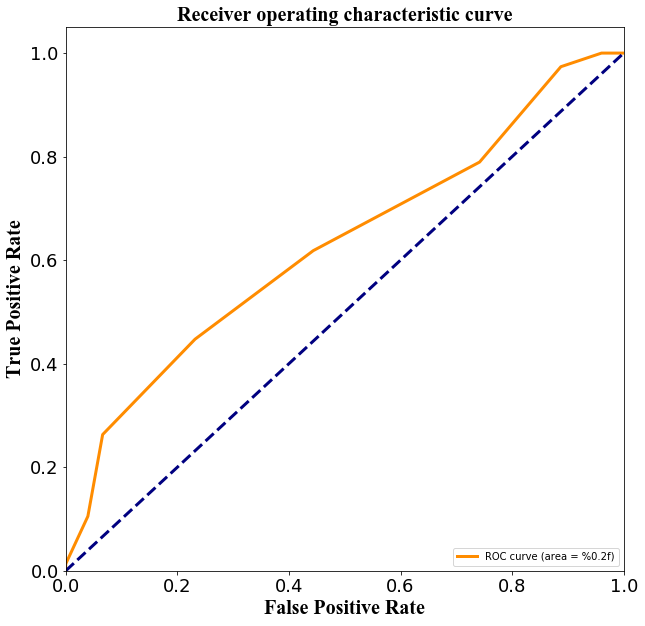

In [30]:
rfPredictedProbability = np.array(rf.predict_proba(testDataMat))
analysisPlot.plotROC(testLabelArr,rfPredictedProbability[:,1],showFig=True,savePath=None)

<h2>4. Conclusion</h2>

In this notebook, we introduced how to use <b>autoBioSeqpy</b> for file reading and engaging it into a research workflow. We hope this notebook could help users to understand the basic way for using it for data transferring and evaluating the modeling result. Then users could use it as a part of their own researches.

We are looking forward to receive any feedback and suggesting. If you have any problem in using this tool, please do not hesitate to connect us at ljs@swmu.edu.cn, thanks.
